# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('C:/Users/Asus/Desktop/New folder/PCOS_data.csv')


In [3]:
dataset.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [5]:
dataset.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [16]:
dataset.shape

(539, 44)

In [8]:
dataset=dataset.dropna()

<AxesSubplot:>

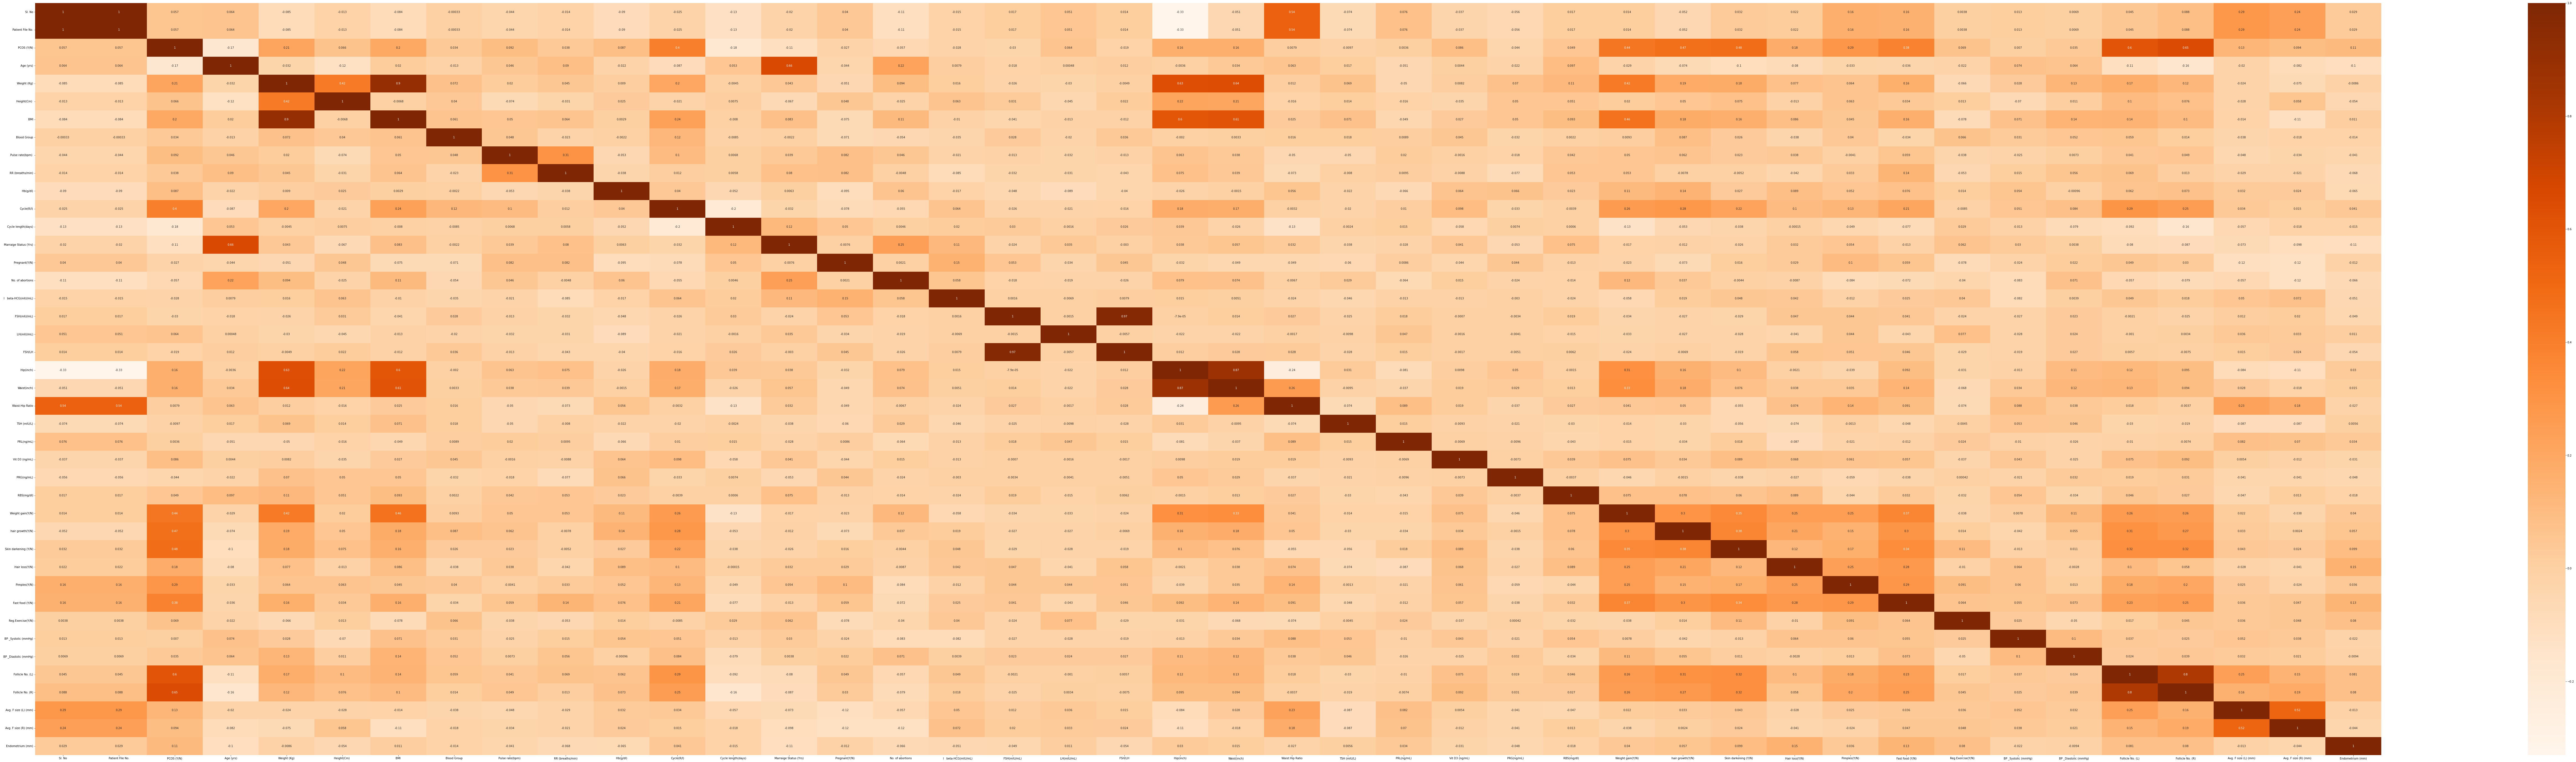

In [13]:
plt.subplots(figsize=(190,50))
sns.heatmap(dataset.corr(),annot=True,cmap='Oranges' )          

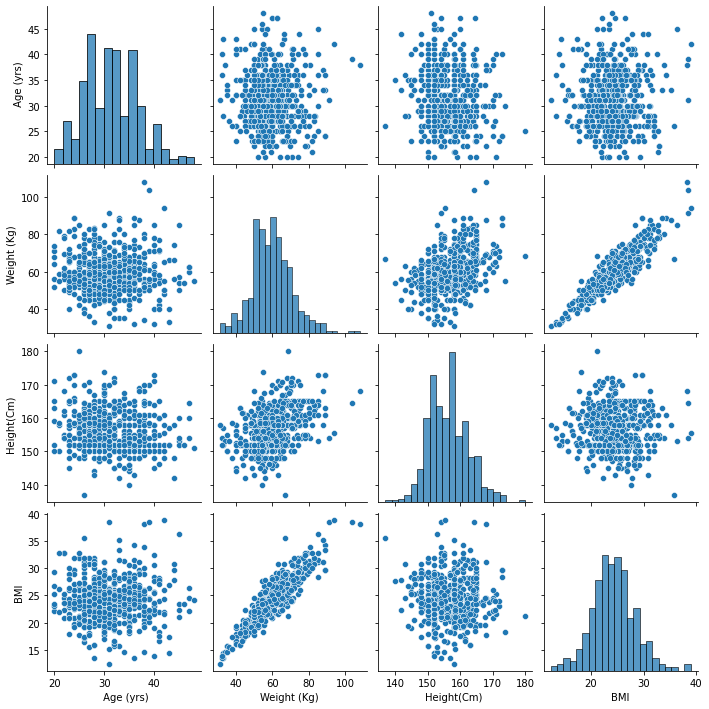

In [372]:
sns.pairplot(dataset.iloc[:,3:7])

<AxesSubplot:xlabel=' Age (yrs)', ylabel='BMI'>

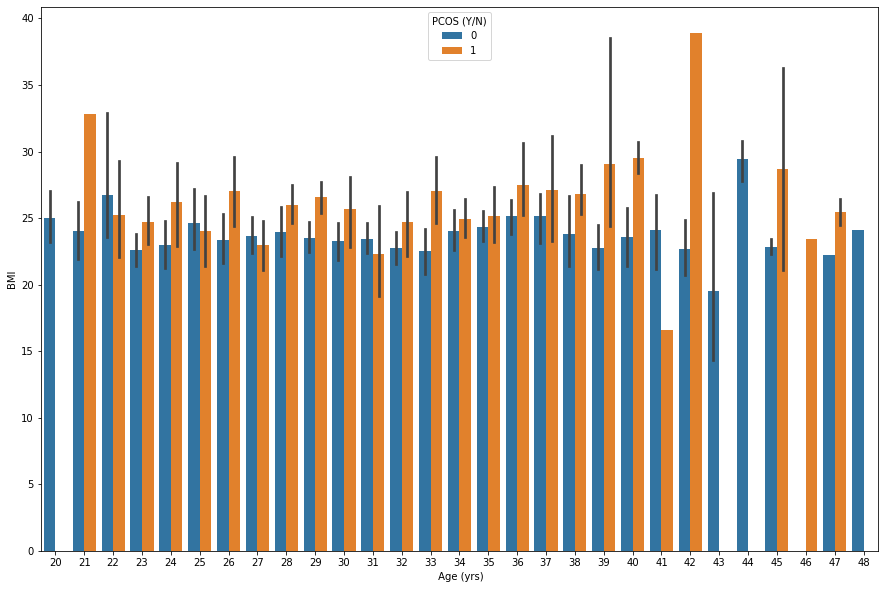

In [373]:
plt.subplots(figsize=(15,10))
sns.barplot(x=' Age (yrs)',y='BMI',hue='PCOS (Y/N)',data=dataset)

In [17]:
columns_to_remove=['AMH(ng/mL)','II    beta-HCG(mIU/mL)','Marraige Status (Yrs)','Hip(inch)','Waist(inch)','TSH (mIU/L)','PRL(ng/mL)','Vit D3 (ng/mL)','PRG(ng/mL)','RBS(mg/dl)']
dataset=dataset.drop(columns_to_remove,axis=1)

In [18]:
for column in dataset:
  columnSeriesObj=dataset[column]
  dataset[column]=pd.to_numeric(dataset[column],errors='coerce')

In [19]:
X = dataset.iloc[:,3:36].values
y = dataset.iloc[:, 2].values

## Splitting the dataset into the Training set and Test set

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 67)

In [376]:
print(X_train)

[[ 35.   68.  154.  ...  18.   17.    9. ]
 [ 29.   52.  147.  ...  16.   19.    8. ]
 [ 26.   78.  159.  ...  16.   18.    8.5]
 ...
 [ 34.   64.2 155.  ...  16.   17.    7.6]
 [ 33.   58.5 159.  ...  15.   18.    7.1]
 [ 35.   61.  158.  ...  19.   18.    8.2]]


In [377]:
print(y_train)

[0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 1]


In [378]:
print(X_test)

[[ 24.   60.  170.  ...  12.   13.5   9.6]
 [ 28.   74.3 154.  ...  14.   13.    8.5]
 [ 22.   79.  155.  ...  16.   15.   13.4]
 ...
 [ 25.   74.  152.  ...  20.   21.    8. ]
 [ 29.   52.  157.  ...  18.   17.   11. ]
 [ 32.   40.  156.  ...  14.   14.    7.3]]


In [379]:
print(y_test)

[0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 0]


## Feature Scaling

In [380]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training the Logistic Regression model on the Training set

In [381]:
def models(X_train,Y_train):
  #Logistic regression
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  #random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=6)
  forest.fit(X_train,y_train)

  return classifier,forest

In [382]:
model=models(X_train,y_train)

In [383]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'#LOGISTIC CLASSIFIER')
logistic_train_acc = accuracy_score(y_train, model[0].predict(X_train))
logistic_test_acc = accuracy_score(y_test, model[0].predict(X_test))

print(confusion_matrix(y_test,model[0].predict(X_test)))
print(classification_report(y_test,model[0].predict(X_test)))

print(f"Test accuracy of  Logistic classifier is : {logistic_test_acc}")

print(f'#RANDOM FOREST CLASSIFIER')
rfc_train_acc = accuracy_score(y_train, model[-1].predict(X_train))
rfc_test_acc = accuracy_score(y_test, model[-1].predict(X_test))

print(confusion_matrix(y_test,model[-1].predict(X_test)))
print(classification_report(y_test,model[-1].predict(X_test)))

print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

#LOGISTIC CLASSIFIER
[[98 12]
 [13 39]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.76      0.75      0.76        52

    accuracy                           0.85       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.84      0.85      0.85       162

Test accuracy of  Logistic classifier is : 0.845679012345679
#RANDOM FOREST CLASSIFIER
[[105   5]
 [  9  43]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       110
           1       0.90      0.83      0.86        52

    accuracy                           0.91       162
   macro avg       0.91      0.89      0.90       162
weighted avg       0.91      0.91      0.91       162

Test accuracy of Random Forest Classifier is : 0.9135802469135802
